In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from game import Game, Move, Player
from players.random_player import RandomPlayer
from players.minimax_v1_player import MinimaxPlayerV1
from players.minimax_v2_player import MinimaxPlayerV2
from players.dqn_player import DQNPlayer
from training import train

# DQN Training

## Self-Play
In this case, the agent plays against itself (taking the roles of both X and O).

Agent: self


100%|██████████| 10000/10000 [06:42<00:00, 24.87it/s]

Model saved to model_self_0.ai


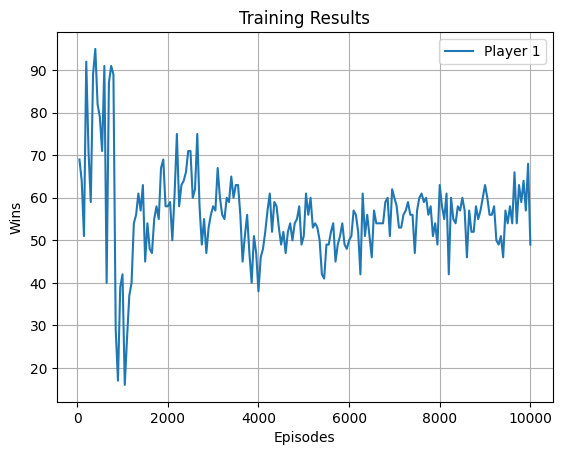

In [2]:
EPISODE_NUM=10000
train(EPISODE_NUM)

## X and O Training
In this case, a X agent plays against a O agent. Both of the agents are DQN agents and each one generates a model.

Agent: two


100%|██████████| 10000/10000 [03:21<00:00, 49.53it/s]

Model saved to model_two_0.ai
Model saved to model_two_1.ai


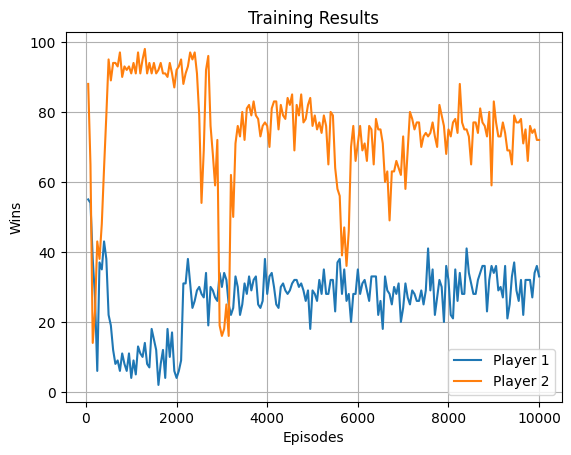

In [3]:
EPISODE_NUM=10000
train(EPISODE_NUM, type="two")

## Multi-Agent Training
In this case, a DQN agent plays against a random agent, minimax agent, and the self-learning agent.

Loading model...
Agent: multi


100%|██████████| 10000/10000 [02:19<00:00, 71.73it/s]

Model saved to /Users/manuelescobar/Files/2023-2/CI/Computational-Intelligence/quixo/models/model_multi.ai


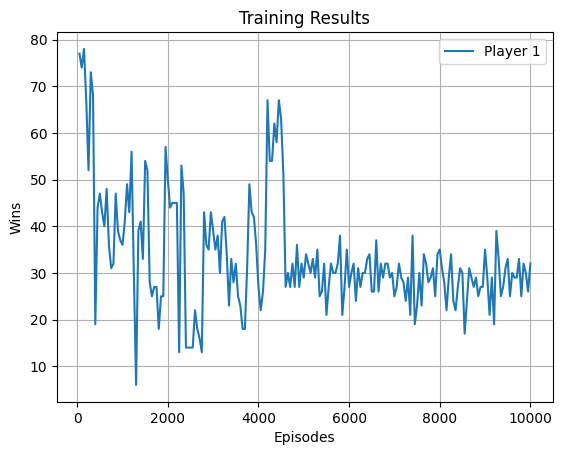

In [15]:
EPISODE_NUM=10000
opponents=[RandomPlayer(),  DQNPlayer(player="self", filename="/Users/manuelescobar/Files/2023-2/CI/Computational-Intelligence/quixo/models")]
train(EPISODE_NUM, type="multi", path="/Users/manuelescobar/Files/2023-2/CI/Computational-Intelligence/quixo", opponents=opponents)

# Comparison

In [5]:
import time
from battle import battle

In [1]:
from prettytable import PrettyTable

def tournament1(agents, games=100):
    # Create a PrettyTable instance
    table = PrettyTable()

    # Define table columns
    table.field_names = ["Battle", "Wins", "Losses", "Draws"]

    # Add data to the table
    for agent1 in range(len(agents)):
        for agent2 in range(agent1+1, len(agents)):
            if type(agents[agent1])== DQNPlayer and type(agents[agent2])== DQNPlayer:
                continue
            print(f"Playing {agents[agent1]} vs {agents[agent2]}")
            if type(agents[agent2])== RandomPlayer:
                wins, loss, draws = battle(agents[agent1], agents[agent2], games)
                table.add_row([f"{agents[agent1]} vs {agents[agent2]}", str((wins/games)*100)+"%", str((loss/games)*100)+"%", str((draws/games)*100)+"%"])
            else:
                wins, losses, draws = battle(agents[agent1], agents[agent2], 1)
                table.add_row([f"{agents[agent1]} vs {agents[agent2]}", str((wins)*100)+"%", str((losses)*100)+"%", str((draws)*100)+"%"])
    # Print the table
    print("Tournament Results over {} games".format(games))
    print(table)
    
def tournament2(agents, games=100):
    # Create a PrettyTable instance
    table = PrettyTable()

    # Define table columns
    table.field_names = ["Battle", "Wins", "Losses", "Draws"]

    # Add data to the table
    for agent1 in range(len(agents)):
        for agent2 in range(agent1+1, len(agents)):
            print(f"Playing {agents[agent1]} vs {agents[agent2]}")
            wins, loss, draws = battle(agents[agent1], agents[agent2], games)
            table.add_row([f"{agents[agent1]} vs {agents[agent2]}", str((wins/games)*100)+"%", str((loss/games)*100)+"%", str((draws/games)*100)+"%"])
    # Print the table
    print("Tournament Results over {} games".format(games))
    print(table)


In [6]:
agents = [
    DQNPlayer(player="X", filename="/Users/manuelescobar/Files/2023-2/CI/Computational-Intelligence/quixo/models"),
    DQNPlayer(player="self", filename="/Users/manuelescobar/Files/2023-2/CI/Computational-Intelligence/quixo/models"),
    DQNPlayer(player="multi", filename="/Users/manuelescobar/Files/2023-2/CI/Computational-Intelligence/quixo/models"),
    MinimaxPlayerV2(),
    RandomPlayer(),
    DQNPlayer(player="O", filename="/Users/manuelescobar/Files/2023-2/CI/Computational-Intelligence/quixo/models"),
]
tournament2(agents, games=50)

Loading model...
Loading model...
Loading model...
Loading model...
Playing DQN Player_X vs DQN Player_self
Playing DQN Player_X vs DQN Player_multi
Playing DQN Player_X vs Minimax Player V2
Playing DQN Player_X vs Random Player
Playing DQN Player_X vs DQN Player_O
Playing DQN Player_self vs DQN Player_multi
Playing DQN Player_self vs Minimax Player V2
Playing DQN Player_self vs Random Player
Playing DQN Player_self vs DQN Player_O
Playing DQN Player_multi vs Minimax Player V2
Playing DQN Player_multi vs Random Player
Playing DQN Player_multi vs DQN Player_O
Playing Minimax Player V2 vs Random Player
Playing Minimax Player V2 vs DQN Player_O
Playing Random Player vs DQN Player_O
Tournament Results over 50 games
+---------------------------------------+--------------------+--------+--------+
|                 Battle                |        Wins        | Losses | Draws  |
+---------------------------------------+--------------------+--------+--------+
|    DQN Player_X vs DQN Player_self